## Binary classification


In [1]:
# Booking calculation data sets 

In [2]:
from warnings import filterwarnings
filterwarnings ("ignore")

In [3]:
## Read the Data sets

In [4]:
import pandas as pd 
df=pd.read_csv("train_booking.csv")
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [6]:
df.isna().sum()

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
# Apply Seperate X & Y

In [9]:
X=df.drop(columns=["id","booking_status"])
Y=df[['booking_status']]

In [10]:
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0


In [11]:
Y.head()

,booking_status
0,0
1,0
2,0
3,0
4,1


## Booking status 0=Not Cancle  ;  1= Cancle

In [12]:
Y.value_counts()

booking_status
0                 25596
1                 16504
Name: count, dtype: int64

In [13]:
X.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
dtype: object

In [14]:
## Create Preprosing a pipe line

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [16]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                         ('scaler',StandardScaler())])

In [17]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [18]:
X_pre=num_pipe.fit_transform(X)
X_pre

array([[ 0.15103974, -0.31345354, -0.99881361, ..., -0.10147907,
        -0.99805198, -0.73769133],
       [ 0.15103974, -0.31345354,  0.13025905, ..., -0.10147907,
        -0.87015314, -0.73769133],
       [ 0.15103974, -0.31345354, -0.99881361, ..., -0.10147907,
        -1.41540612, -0.73769133],
       ...,
       [ 0.15103974, -0.31345354, -0.99881361, ..., -0.10147907,
        -0.2306589 , -0.73769133],
       [-1.75392524, -0.31345354, -0.99881361, ..., -0.10147907,
         0.41556686, -0.73769133],
       [ 0.15103974, -0.31345354,  0.13025905, ..., -0.10147907,
        -1.06536717, -0.73769133]])

In [19]:
cols=num_pipe.get_feature_names_out()
cols

array(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date',
       'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests'], dtype=object)

In [20]:
X_pre=pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.151040,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-1.170469,0.409661,-2.330398,-0.214091,0.428551,5.766758,33.699120,-0.101479,-0.998052,-0.737691
1,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.161740,0.409661,-0.209778,1.473487,-1.149928,-0.173408,-0.060506,-0.101479,-0.870153,-0.737691
2,0.151040,-0.313454,-0.998814,-0.979466,-0.407020,-0.160945,-0.515173,2.604122,0.409661,1.557404,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.415406,-0.737691
3,-1.753925,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-0.886758,0.409661,1.557404,-1.676659,0.428551,-0.173408,-0.060506,-0.101479,-1.307702,-0.737691
4,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,1.901012,0.409661,0.850531,0.010919,-1.149928,-0.173408,-0.060506,-0.101479,-0.122955,-0.737691


### Test train split

In [21]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X_pre,Y,test_size=0.2,random_state=42)

In [22]:
Xtrain.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
15559,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,0.685890,-0.479694,0.409661,1.203968,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.199998,1.842849
32783,0.151040,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,-0.381012,0.409661,1.557404,1.135971,0.428551,-0.173408,-0.060506,-0.101479,0.189388,0.552579
11797,2.056005,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,0.685890,-0.282330,0.409661,0.497095,-0.889123,0.428551,-0.173408,-0.060506,-0.101479,1.716096,-0.737691
39750,0.151040,-0.313454,-0.998814,-0.979466,2.996268,-0.160945,-0.515173,1.444607,0.409661,0.143658,-0.439102,-1.149928,-0.173408,-0.060506,-0.101479,0.280936,0.552579
28711,0.151040,-0.313454,1.259332,0.421768,-0.407020,-0.160945,0.685890,-0.109636,0.409661,0.850531,-1.001628,0.428551,-0.173408,-0.060506,-0.101479,0.746758,-0.737691


In [23]:
Ytrain.head()

,booking_status
15559,0
32783,0
11797,1
39750,1
28711,1


In [24]:
Xtest.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
8768,0.15104,-0.313454,-0.998814,0.421768,-0.40702,-0.160945,-0.515173,-0.566041,0.409661,-2.330398,1.135971,-1.149928,-0.173408,-0.060506,-0.101479,-0.643436,0.552579
38340,0.15104,-0.313454,-0.998814,-0.278849,-0.40702,-0.160945,-0.515173,1.481613,0.409661,0.143658,-1.564154,0.428551,-0.173408,-0.060506,-0.101479,-0.285588,-0.737691
7104,0.15104,-0.313454,1.259332,-0.979466,-0.40702,-0.160945,4.289080,-0.553706,0.409661,-1.623525,1.023466,0.428551,-0.173408,-0.060506,-0.101479,0.002252,-0.737691
36898,0.15104,1.908162,1.259332,1.122386,-0.40702,-0.160945,-0.515173,-0.566041,0.409661,1.203968,-0.551607,0.428551,-0.173408,-0.060506,-0.101479,0.541312,3.133119
9747,0.15104,-0.313454,1.259332,0.421768,-0.40702,-0.160945,-0.515173,0.507127,0.409661,-1.270088,1.585992,0.428551,-0.173408,-0.060506,-0.101479,-0.366636,0.552579


In [25]:
Ytest.head()

,booking_status
8768,0
38340,1
7104,0
36898,0
9747,0


In [26]:
Xtrain.shape

(33680, 17)

In [27]:
Xtest.shape

(8420, 17)

In [28]:
Ytrain.shape

(33680, 1)

In [29]:
Xtrain.shape[1]

17

In [30]:
Ytest.shape

(8420, 1)

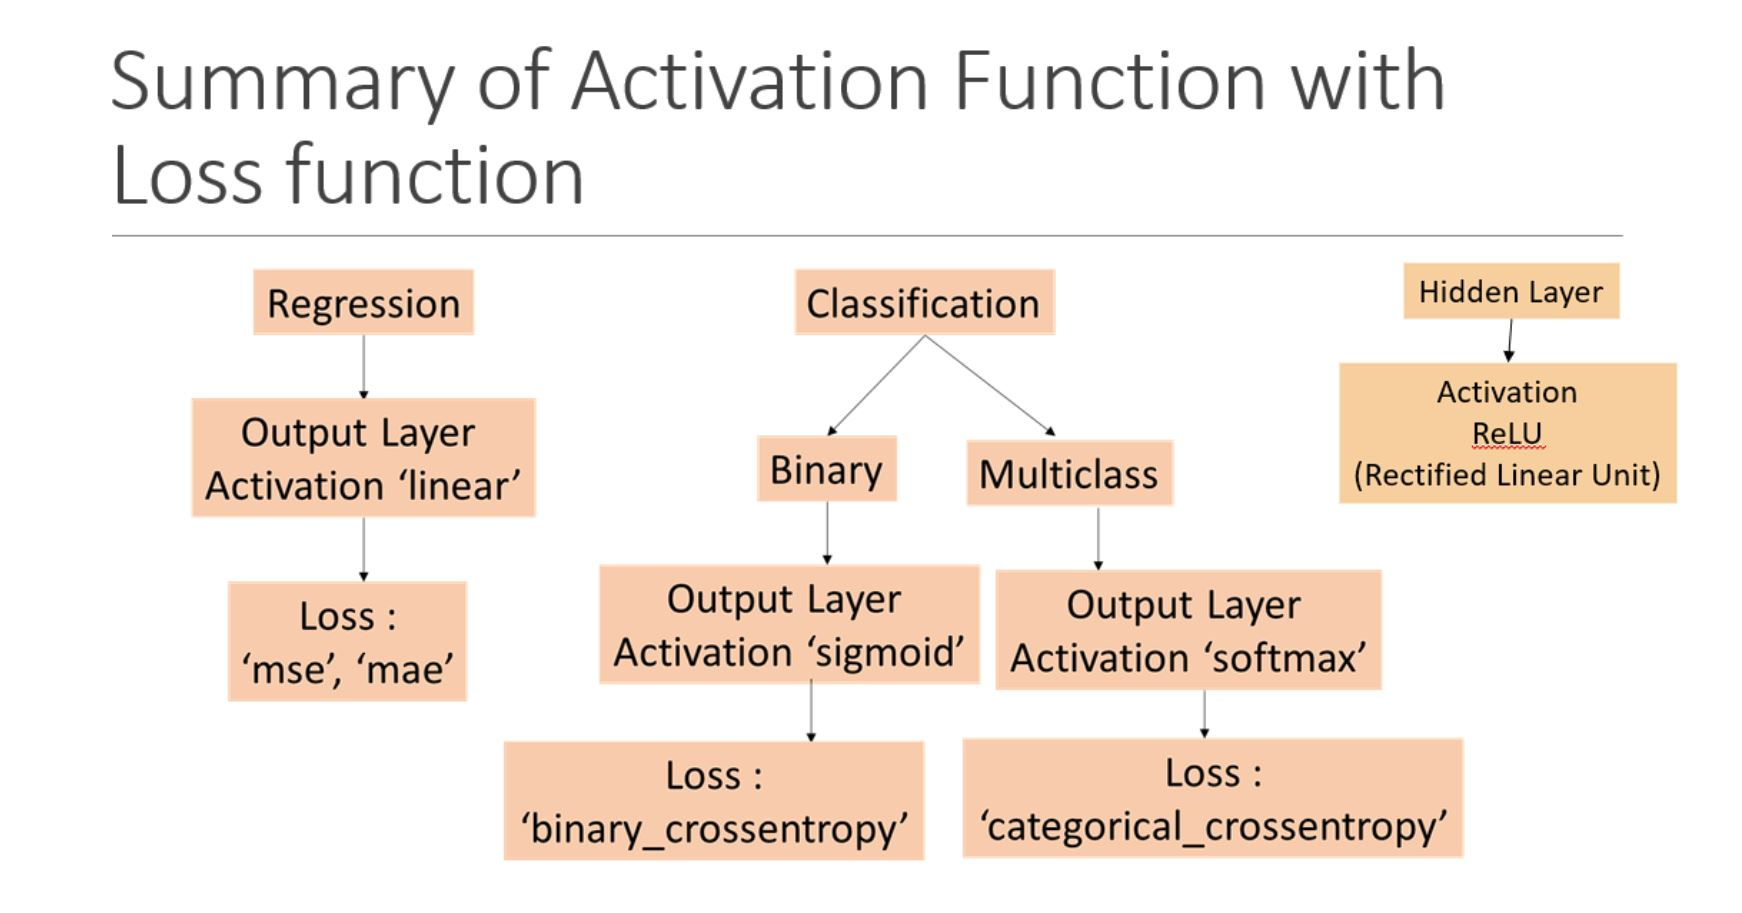

## Create Neural Network

In [31]:
# Drop out layer
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [32]:
model = Sequential()

# Hidden Layer 1 with 17 input neurons
model.add(Dense(64, activation='relu', input_dim=Xtrain.shape[1]))
model.add(Dropout(0.4))

# Hidden Layer 2
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

# Output Layer Binary Classification - Sigmoid
model.add(Dense(1, activation='sigmoid'))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3265 (12.75 KB)
Trainable params: 3265 (12.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Compile the model

In [34]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit your model

In [35]:
hist = model.fit(Xtrain, Ytrain, validation_split=0.2, epochs=100)

Epoch 1/100


842/842 [==============================] - 4s 3ms/step - loss: 0.5307 - accuracy: 0.7342 - val_loss: 0.4867 - val_accuracy: 0.7643
Epoch 2/100
842/842 [==============================] - 2s 3ms/step - loss: 0.4875 - accuracy: 0.7678 - val_loss: 0.4774 - val_accuracy: 0.7758
Epoch 3/100
842/842 [==============================] - 2s 3ms/step - loss: 0.4799 - accuracy: 0.7721 - val_loss: 0.4713 - val_accuracy: 0.7794
Epoch 4/100
842/842 [==============================] - 2s 3ms/step - loss: 0.4747 - accuracy: 0.7777 - val_loss: 0.4677 - val_accuracy: 0.7789
Epoch 5/100
842/842 [==============================] - 3s 4ms/step - loss: 0.4713 - accuracy: 0.7784 - val_loss: 0.4654 - val_accuracy: 0.7809
Epoch 6/100
842/842 [==============================] - 3s 3ms/step - loss: 0.4669 - accuracy: 0.7808 - val_loss: 0.4626 - val_accuracy: 0.7813
Epoch 7/100
842/842 [==============================] - 3s 3ms/step - loss: 0.4652 - accuracy: 0.7828 - val_loss: 0.4605 - val_accuracy: 0.78

In [36]:
## Plot learning curve for above data

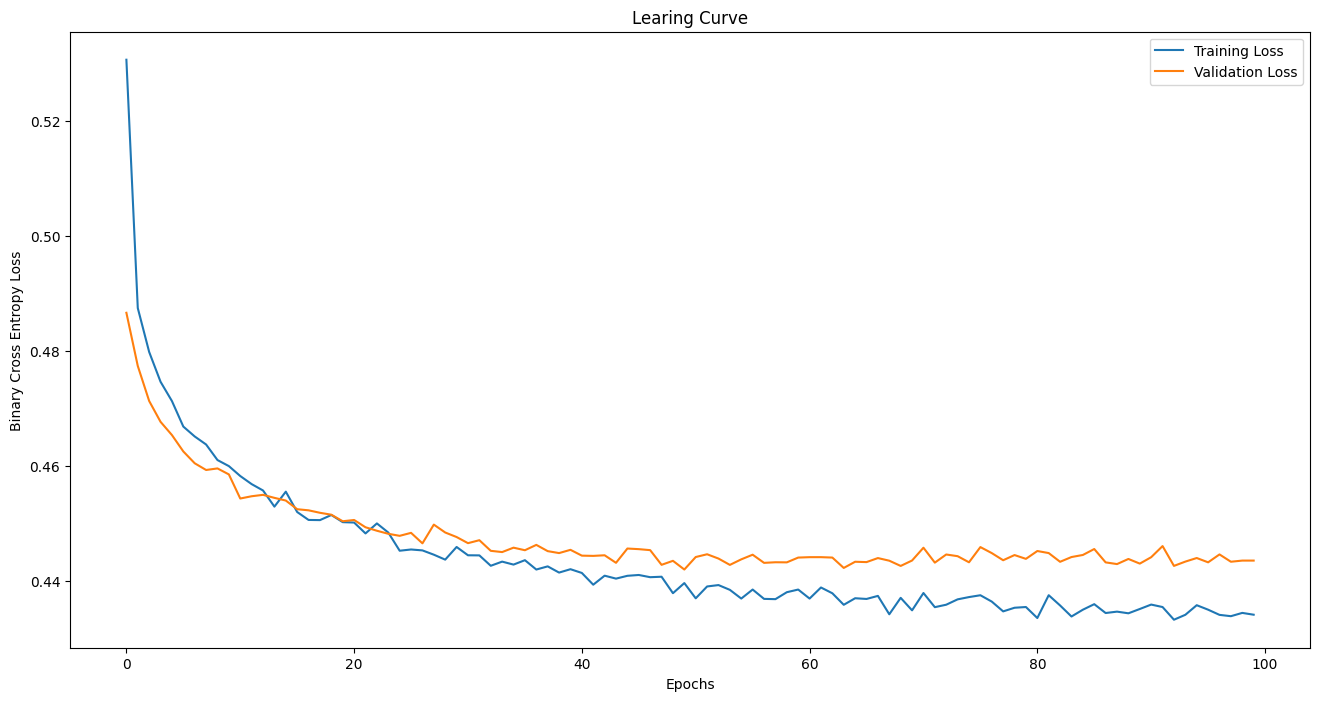

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy Loss')
plt.title('Learing Curve')
plt.legend()
plt.show()

## Evalute model

In [40]:
model.evaluate(Xtrain,Ytrain)

1053/1053 [==============================] - 4s 3ms/step - loss: 0.4170 - accuracy: 0.8121


[0.4170445203781128, 0.8121140003204346]

In [41]:
model.evaluate(Xtest,Ytest)

264/264 [==============================] - 1s 3ms/step - loss: 0.4282 - accuracy: 0.8084


[0.4282161593437195, 0.8084322810173035]

## Predict the probailities

In [42]:
Yprob_tr=model.predict(Xtrain)
Yprob_ts=model.predict(Xtest)

264/264 [==============================] - 1s 2ms/step


In [43]:
Yprob_tr[0:5]

array([[0.00764525],
       [0.1570651 ],
       [0.83791745],
       [0.7267902 ],
       [0.86828834]], dtype=float32)

In [44]:
Yprob_ts[0:5]

array([[0.02945115],
       [0.89175683],
       [0.38613403],
       [0.00169115],
       [0.17730957]], dtype=float32)

## Get predection 

In [45]:
Ypred_tr=[1 if i>=0.5 else 0 for i in Yprob_tr]
Ypred_tr[0:5]

[0, 0, 1, 1, 1]

In [46]:
Ytrain.head()

,booking_status
15559,0
32783,0
11797,1
39750,1
28711,1


In [47]:
Ypred_ts=[1 if i>=0.5 else 0 for i in Yprob_ts]
Ypred_ts[0:5]

[0, 1, 0, 0, 0]

In [48]:
Ytest.head()

,booking_status
8768,0
38340,1
7104,0
36898,0
9747,0


## Create Confuction metrix

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

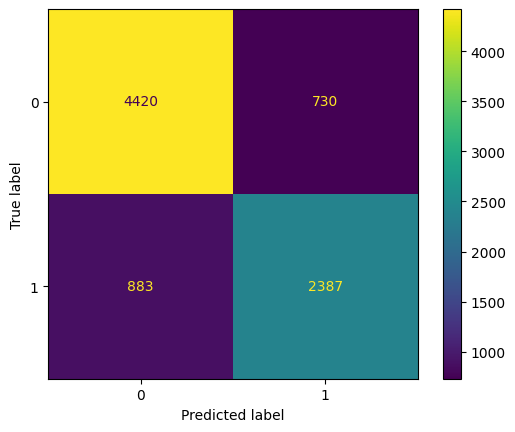

In [51]:
cf= confusion_matrix(Ytest,Ypred_ts)
cfd=ConfusionMatrixDisplay(cf)
cfd.plot()

## Classification Report

In [52]:
from sklearn.metrics import classification_report
print(classification_report(Ytest,Ypred_ts))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      5150
           1       0.77      0.73      0.75      3270

    accuracy                           0.81      8420
   macro avg       0.80      0.79      0.80      8420
weighted avg       0.81      0.81      0.81      8420



## Save the model for future use

In [53]:
model.save('Bookingmodel.keras')

## Load the model

In [54]:
from keras.models import load_model
nn=load_model('Bookingmodel.keras')
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3265 (12.75 KB)
Trainable params: 3265 (12.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Preduction on Test booking.csv

In [56]:
Xnew=pd.read_csv('test_booking.csv')
Xnew.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [57]:
Xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28068 entries, 0 to 28067
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    28068 non-null  int64  
 1   no_of_adults                          28068 non-null  int64  
 2   no_of_children                        28068 non-null  int64  
 3   no_of_weekend_nights                  28068 non-null  int64  
 4   no_of_week_nights                     28068 non-null  int64  
 5   type_of_meal_plan                     28068 non-null  int64  
 6   required_car_parking_space            28068 non-null  int64  
 7   room_type_reserved                    28068 non-null  int64  
 8   lead_time                             28068 non-null  int64  
 9   arrival_year                          28068 non-null  int64  
 10  arrival_month                         28068 non-null  int64  
 11  arrival_date   

In [58]:
Xnew.isna().sum()

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
dtype: int64

In [59]:
Xnew.duplicated().sum()

0

In [62]:
Xnew1=Xnew.drop (columns=['id'])
Xnew1.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [63]:
Xnew_pre=num_pipe.transform(Xnew1)
Xnew_pre

array([[ 2.05600472, -0.31345354,  0.13025905, ..., -0.10147907,
         0.29709213,  1.84284918],
       [ 0.15103974, -0.31345354, -0.99881361, ..., -0.10147907,
        -0.5268457 , -0.73769133],
       [ 0.15103974,  4.12977678, -0.99881361, ..., -0.10147907,
         3.64669564,  0.55257892],
       ...,
       [ 0.15103974, -0.31345354,  0.13025905, ..., -0.10147907,
        -0.5268457 , -0.73769133],
       [ 2.05600472, -0.31345354, -0.99881361, ..., -0.10147907,
         1.56665649, -0.73769133],
       [ 0.15103974, -0.31345354,  1.25933171, ..., -0.10147907,
        -0.54542469, -0.73769133]])

In [65]:
Xnew_pre=pd.DataFrame(Xnew_pre,columns=cols)
Xnew_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2.056005,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,0.087728,0.409661,1.557404,-1.226638,0.428551,-0.173408,-0.060506,-0.101479,0.297092,1.842849
1,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-1.010111,-2.441040,0.850531,0.573445,-1.149928,-0.173408,-0.060506,-0.101479,-0.526846,-0.737691
2,0.151040,4.129777,-0.998814,-0.979466,-0.407020,-0.160945,3.088017,-1.059452,0.409661,0.143658,-0.664112,0.428551,-0.173408,-0.060506,-0.101479,3.646696,0.552579
3,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-0.195983,0.409661,-0.916652,1.585992,-1.149928,-0.173408,-0.060506,-0.101479,-0.641282,-0.737691
4,-1.753925,-0.313454,-0.998814,-0.278849,2.996268,-0.160945,-0.515173,-1.195140,0.409661,0.497095,0.573445,0.428551,-0.173408,-0.060506,-0.101479,1.061793,-0.737691


## Get Probibalities prdidection for above data

In [66]:
prob=model.predict(Xnew_pre)
prob[0:5]

878/878 [==============================] - 4s 4ms/step


array([[0.08057949],
       [0.03471389],
       [0.40284136],
       [0.16935329],
       [0.5117791 ]], dtype=float32)

## Predection are 
0=Not cancle Booking
1=Cancle Booking

In [68]:
preds = [1 if i>=0.5 else 0 for i in prob]
preds[0:5]

[0, 0, 0, 0, 1]

## Save above values in Xnew DataFrame

In [69]:
df_final=Xnew[['id']]
df_final.head()

,id
0,42100
1,42101
2,42102
3,42103
4,42104


In [70]:
df_final['booking_status_pred']=preds

In [71]:
df_final['Cancellation_prob'] = prob

In [73]:
df_final.head()

,id,booking_status_pred,Cancellation_prob
0,42100,0,0.080579
1,42101,0,0.034714
2,42102,0,0.402841
3,42103,0,0.169353
4,42104,1,0.511779


In [74]:
df_final['booking_status_pred'].value_counts()

booking_status_pred
0    17716
1    10352
Name: count, dtype: int64

## Barplot for booking status

<Axes: title={'center': 'Count plot for booking status preduction'}, xlabel='booking_status_pred'>

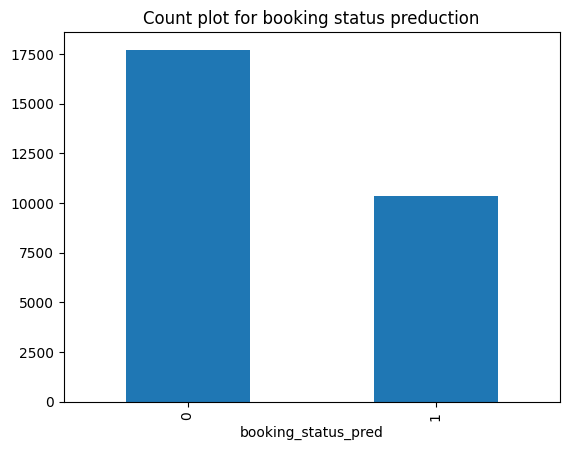

In [75]:
df_final['booking_status_pred'].value_counts().plot(kind='bar',title='Count plot for booking status preduction')

## Save the file into csv

In [78]:
df_final.to_csv ('Booking Result.csv',index=False)